In [119]:
# importing necessary packages
import pandas as pd
from collections import Counter, defaultdict
import numpy as np


In [120]:
with open("../datasets/acm.txt", 'r') as file:
    lines = file.readlines()

In [121]:
data = []
pub = None  

for line in lines:
    if line[0:2] == "#*":  # Start of a new publication
        if pub is not None:
            
            data.append(pub)
        # Initialize a new publication
        pub = {"title": "", "authors": [], "year": "", "venue": "", "id": "", "refs": [], "abstract": ""}
        pub['title'] = line[2:].strip()
    elif line[0:2] == "#@" and pub is not None:
        pub["authors"] = line[2:].strip().split(",")
    elif line[0:2] == "#t" and pub is not None:
        pub["year"] = line[2:].strip()
    elif line[0:2] == "#c" and pub is not None:
        pub["venue"] = line[2:].strip()
    elif line[0:2] == "#%" and pub is not None:
        pub["refs"].append(line[2:].strip())
    elif line[0:2] == "#!" and pub is not None:
        pub["abstract"] = line[2:].strip()
    elif line[0:2] == "#i" and pub is not None:
        pub["id"] = line[6:].strip()


if pub is not None:
    data.append(pub)


In [122]:
df = pd.DataFrame(data)
df

,title,authors,year,venue,id,refs,abstract
0,MOSFET table look-up models for circuit simula...,[],1984,"Integration, the VLSI Journal",1,[],
1,The verification of the protection mechanisms ...,[Virgil D. Gligor],1984,International Journal of Parallel Programming,2,[],
2,Another view of functional and multivalued dep...,"[M. Gyssens, J. Paredaens]",1984,International Journal of Parallel Programming,3,[],
3,Entity-relationship diagrams which are in BCNF,"[Sushil Jajodia, Peter A. Ng, Frederick N. S...",1984,International Journal of Parallel Programming,4,[],
4,The computer comes of age,[Rene Moreau],1984,The computer comes of age,5,[],
...,...,...,...,...,...,...,...
2385017,Editorial Board,[],2016,Theoretical Computer Science,2385062,[],
2385018,Linear-time computation of prefix table for we...,"[-, -, -]",2016,Theoretical Computer Science,2385063,[2381731],The prefix table of a string is one of the mos...
2385019,A space-efficient alphabet-independent Four-Ru...,"[-, -, -, -]",2016,Theoretical Computer Science,2385064,[2381731],Given two strings X ( | X | = m ) and Y ( | Y ...
2385020,Computers in Entertainment (CIE) - Special Iss...,[],2016,Computers in Entertainment (CIE),2385065,[],


PART A

NO. OF DISTINCT AUTHORS

In [123]:


# Use set comprehension to extract and strip names, filtering out empty ones.
unique_authors = {name.strip() for names in df['authors'] if names for name in names if name.strip()}

# Count of unique authors
unique_author_count = len(unique_authors)


print("Number of unique authors:", unique_author_count)


Number of unique authors: 1651563


NO. OF DISTINCT VENUES

In [124]:
df.venue.unique().size

273330

NO. OF PUBLICATIONS

In [125]:
df.id.unique().size

2385013

NO. OF REFERENCES AND CITATIONS 

In [126]:
from collections import Counter

# Assuming df.refs is a column containing lists of references.
citations = Counter(ref_id for ref_ids in df.refs if ref_ids for ref_id in ref_ids)



In [127]:
citations

Counter({'2135000': 938039,
         '2381731': 82080,
         '408395': 8620,
         '369235': 6526,
         '190580': 5297,
         '136349': 4882,
         '168250': 4717,
         '729436': 4490,
         '760804': 4167,
         '115607': 3452,
         '481289': 3339,
         '44875': 3328,
         '70369': 3101,
         '387426': 2765,
         '376265': 2728,
         '152933': 2719,
         '384910': 2667,
         '114993': 2629,
         '406492': 2522,
         '926880': 2522,
         '757952': 2496,
         '268078': 2492,
         '410275': 2401,
         '722903': 2388,
         '340174': 2296,
         '3887': 2234,
         '319993': 2223,
         '381869': 2213,
         '209020': 2179,
         '197393': 2111,
         '309207': 2082,
         '449587': 2078,
         '356891': 2057,
         '124072': 2054,
         '408637': 2024,
         '366686': 2022,
         '3872': 2016,
         '1790': 1999,
         '375016': 1998,
         '320186': 1949,
   

In [128]:
references = defaultdict(int)
for i, ref_ids in zip(df.id, df.refs):
    references[i] = len(ref_ids)
references

defaultdict(int,
            {'1': 0,
             '2': 0,
             '3': 0,
             '4': 0,
             '5': 0,
             '6': 0,
             '7': 0,
             '8': 0,
             '9': 2,
             '10': 1,
             '11': 5,
             '12': 13,
             '13': 0,
             '14': 0,
             '15': 0,
             '16': 0,
             '17': 0,
             '18': 0,
             '19': 0,
             '20': 0,
             '21': 0,
             '22': 0,
             '23': 0,
             '24': 0,
             '25': 0,
             '26': 0,
             '27': 0,
             '28': 0,
             '29': 0,
             '30': 0,
             '31': 0,
             '32': 0,
             '33': 0,
             '34': 0,
             '35': 0,
             '36': 0,
             '37': 0,
             '38': 0,
             '39': 0,
             '40': 0,
             '41': 0,
             '42': 0,
             '43': 0,
             '44': 0,
             '45': 0,
 

PART B

In [129]:
ven = df[df.apply(lambda x: "Principles and Practice of Knowledge Discovery in Databases" in x['venue'], axis=1)]
ven.venue.unique()

array(["PKDD '04 Proceedings of the 8th European Conference on Principles and Practice of Knowledge Discovery in Databases",
       'Knowledge Discovery in Databases: PKDD 2006: 10th European Conference on Principles and Practice of Knowledge Discovery in Databases, Berlin, Germany, September ... (Lecture Notes in Computer Science)',
       'Knowledge Discovery in Databases: PKDD 2005: 9th European Conference on Principles and Practice of Knowledge Discovery in Databases, Porto, Portugal, October ... / Lecture Notes in Artificial Intelligence)',
       'PKDD 2007 Proceedings of the 11th European conference on Principles and Practice of Knowledge Discovery in Databases',
       "PKDD'05 Proceedings of the 9th European conference on Principles and Practice of Knowledge Discovery in Databases"],
      dtype=object)

In [130]:
ven

,title,authors,year,venue,id,refs,abstract
799594,Summarization of dynamic content in web collec...,"[Adam Jatowt, Mitsuru Ishizuka]",2004,PKDD '04 Proceedings of the 8th European Confe...,799596,"[168250, 207271, 217577, 272248, 287615, 35790...",This paper describes a new research proposal o...
799731,Proceedings of the 8th European Conference on ...,"[Jean-François Boulicaut, Floriana Esposito, ...",2004,PKDD '04 Proceedings of the 8th European Confe...,799733,[],
799732,Random matrices in data analysis,[Dimitris Achlioptas],2004,PKDD '04 Proceedings of the 8th European Confe...,799734,[],We show how carefully crafted random matrices ...
799733,Data privacy,[Rakesh Agrawal],2004,PKDD '04 Proceedings of the 8th European Confe...,799735,[],There is increasing need to build information ...
799734,Breaking through the syntax barrier: searching...,[Soumen Chakrabarti],2004,PKDD '04 Proceedings of the 8th European Confe...,799736,[],The next wave in search technology will be dri...
...,...,...,...,...,...,...,...
1673597,Speeding up logistic model tree induction,"[Marc Sumner, Eibe Frank, Mark Hall]",2005,PKDD'05 Proceedings of the 9th European confer...,1673618,"[136349, 290481, 810934, 2135000]",Logistic Model Trees have been shown to be ver...
1673598,A random method for quantifying changing distr...,"[Haixun Wang, Jian Pei]",2005,PKDD'05 Proceedings of the 9th European confer...,1673619,"[115607, 342599, 400846, 424996, 443615, 48145...",In applications such as fraud and intrusion de...
1673599,Deriving class association rules based on leve...,"[Takashi Washio, Koutarou Nakanishi, Hiroshi...",2005,PKDD'05 Proceedings of the 9th European confer...,1673620,"[210159, 248791, 397383, 466482, 481289, 54604...",Most approaches of Class Association Rule (CAR...
1673600,An incremental algorithm for mining generators...,"[Lijun Xu, Kanglin Xie]",2005,PKDD'05 Proceedings of the 9th European confer...,1673621,"[280466, 464203, 466663, 481289, 511332, 54669...",This paper presents an efficient algorithm for...


Although there are 212 publications, there are only 5 unique venues connected to the conference. This could indicate that the conference name is consistently included in the dataset and that the dataset contains an extensive collection of publications from the conference over a number of years. In general, this would be a sign of consistent and high-quality data.

PART C

In [131]:
pip install matplotlib



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [132]:
from collections import defaultdict

author_pubs = defaultdict(int)

# Iterate over each author list in the 'authors' column
for author_list in df['authors']:
    if author_list:
        for author in author_list:
            # Increment the publication count for each author
            author_pubs[author.strip()] += 1

# Convert the counts to a list for plotting
publication_counts = list(author_pubs.values())


In [133]:
author_pubs

defaultdict(int,
            {'Virgil D. Gligor': 68,
             'M. Gyssens': 7,
             'J. Paredaens': 18,
             'Sushil Jajodia': 418,
             'Peter A. Ng': 36,
             'Frederick N. Springsteel': 8,
             'Rene Moreau': 1,
             'A. G. Akritas': 4,
             'S. S. Lyengar': 2,
             'A. A. Rampuria': 1,
             'C. C. Chang': 56,
             'M. W. Du': 9,
             'R. C. T. Lee': 59,
             'David Haussler': 102,
             'Hans Röck': 2,
             'George M. Trojan': 1,
             'John E. Savage': 46,
             'Joseph Já Já': 1,
             'John S. Mallozzi': 9,
             'Nicholas J. De Lillo': 4,
             'Karel Culik': 70,
             'II': 973,
             'Arto Salomaa': 222,
             'John C. Mitchell': 166,
             'Uzi Vishkin': 151,
             'Avi Wigderson': 170,
             'Hana Galperin': 2,
             'H. S. Witsenhausen': 7,
             'A. D. Wyner': 22,
    

In [134]:
max(author_pubs.values())

8878

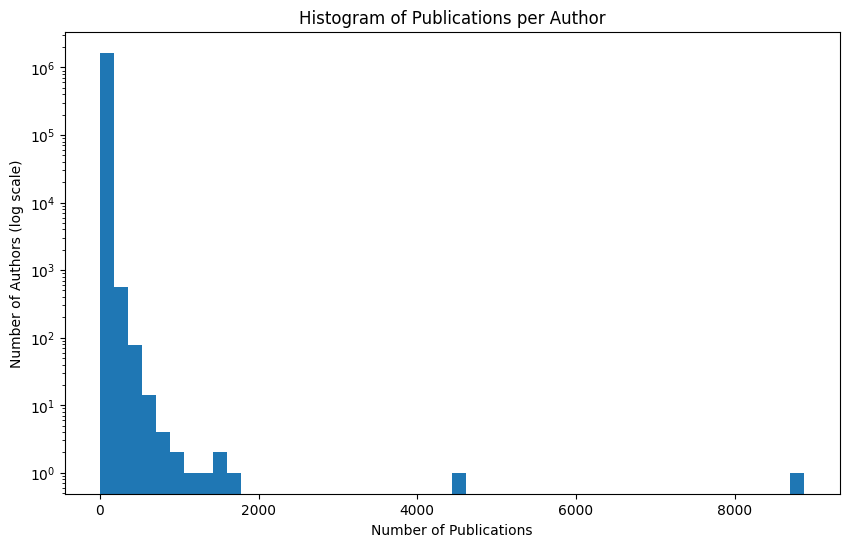

In [135]:
import matplotlib.pyplot as plt

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(publication_counts, bins=50, log=True)  # Logarithmic scale for the y-axis

plt.title("Histogram of Publications per Author")
plt.xlabel("Number of Publications")
plt.ylabel("Number of Authors (log scale)")

# Show the plot
plt.show()


PART D

In [136]:
import pandas as pd

# Convert the publication counts to a Pandas Series
publications_series = pd.Series(list(author_pubs.values()))

# Calculate mean and standard deviation
mean = publications_series.mean()
std = publications_series.std()

# Calculate quartiles
quartiles = publications_series.quantile([0.25, 0.5, 0.75])

# Print the results
print(f"Mean and standard deviation of number of publications per author is {mean:.2f} and {std:.2f} respectively.\n")
print(f"Q1, Q2/Median, Q3 values are {quartiles.values}.")


Mean and standard deviation of number of publications per author is 3.46 and 12.77 respectively.

Q1, Q2/Median, Q3 values are [1. 1. 3.].


Mean: The authors of the dataset have 3.46 publications on average. The mean value may be affected by authors with a high number of publications due to the skewness of the data.
At least half of the writers only have one or two published pieces, according to the second quarter median. This demonstrates that the median is comparatively low, indicating that most writers have a small number of published works to their credit.

The high standard deviation, which denotes a wide range in the data, implies that the number of publications per author varies significantly. The authors who publish considerably more frequently than the average have a significant impact on the standard deviation.
Consequently, the data's right skewness becomes evident.



PART E

(array([2.71007e+05, 1.45600e+03, 2.85000e+02, 1.28000e+02, 8.10000e+01,
        4.60000e+01, 3.80000e+01, 3.10000e+01, 2.90000e+01, 3.00000e+01,
        2.40000e+01, 2.00000e+01, 1.60000e+01, 6.00000e+00, 1.40000e+01,
        1.00000e+01, 6.00000e+00, 5.00000e+00, 9.00000e+00, 4.00000e+00,
        2.00000e+00, 5.00000e+00, 7.00000e+00, 7.00000e+00, 6.00000e+00,
        1.00000e+00, 8.00000e+00, 2.00000e+00, 5.00000e+00, 0.00000e+00,
        3.00000e+00, 1.00000e+00, 3.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 3.00000e+00, 1.00000e+00,
        3.00000e+00, 1.00000e+00, 1.00000e+00, 3.00000e+00, 2.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 2.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00

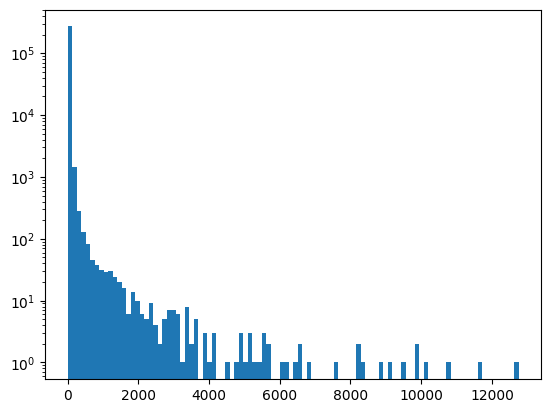

In [137]:
publications_per_venue = df.venue.value_counts()
plt.hist(publications_per_venue, bins=100, log=True)

In [138]:


# Calculate mean and standard deviation using Pandas methods
mean = publications_per_venue.mean()
std = publications_per_venue.std()

# Calculate Q1, median (Q2), and Q3 using Pandas quantile method
q1 = publications_per_venue.quantile(0.25)
median = publications_per_venue.quantile(0.5)
q3 = publications_per_venue.quantile(0.75)

# Print the results
print(f"Mean and standard deviation of number of publications per author is {mean} and {std} respectively.\n")
print(f"Q1, Median, Q3 values are {[q1, median, q3]}.")

# Identify the venue with the maximum number of publications
max_venue = publications_per_venue.idxmax()
max_publications = publications_per_venue.max()

# Print the venue with the maximum number of publications
print(f"{max_venue} is the venue with max number of publications - {max_publications}")


Mean and standard deviation of number of publications per author is 8.725796656056781 and 106.78894831518932 respectively.

Q1, Median, Q3 values are [1.0, 1.0, 1.0].
IEEE Transactions on Information Theory is the venue with max number of publications - 12754


PART F

In [139]:
# Find the publication with the largest number of references
max_ref_id = max(references, key=references.get)
max_ref_count = references[max_ref_id]
print(f"Publication with id {max_ref_id} with number of references = {max_ref_count}")

# Find the publication with the largest number of citations
max_citation_id = max(citations, key=citations.get)
max_citation_count = citations[max_citation_id]
print(f"Publication with id {max_citation_id} with number of citations = {max_citation_count}")


Publication with id 2015217 with number of references = 809
Publication with id 2135000 with number of citations = 938039


In [140]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'references' dictionary to a Pandas Series
ref_series = pd.Series(references.values())


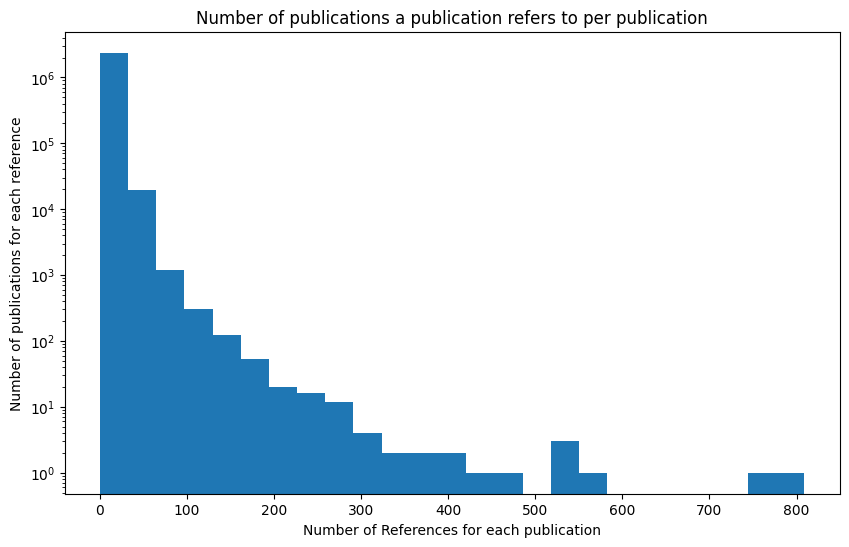

In [141]:
# Plot the histogram using Pandas plotting capabilities
ref_series.hist(bins=25, log=True, grid=False, figsize=(10, 6))

# Setting the labels and title
plt.xlabel("Number of References for each publication")
plt.ylabel("Number of publications for each reference")
plt.title("Number of publications a publication refers to per publication")

# Display the plot
plt.show()


In [142]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'citations' dictionary to a Pandas Series
citations_series = pd.Series(citations.values())


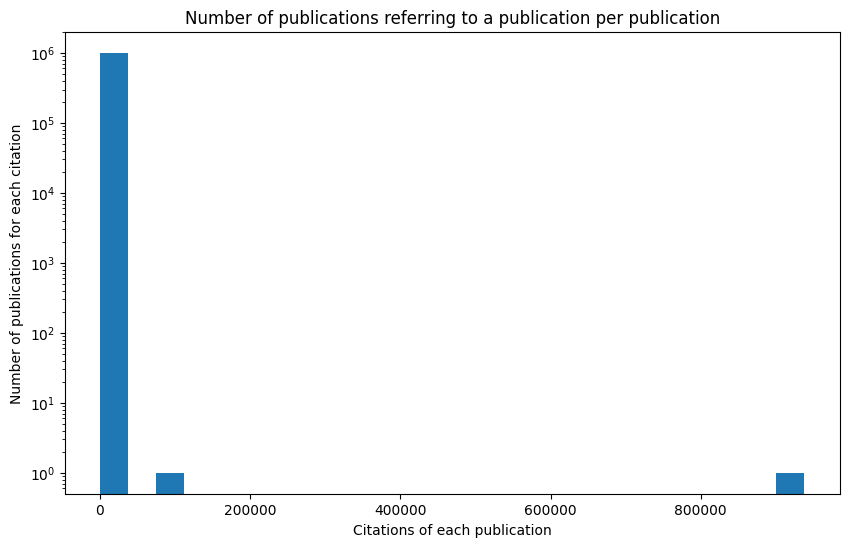

In [143]:
# Plot the histogram using Pandas plotting capabilities
citations_series.hist(bins=25, log=True, grid=False, figsize=(10, 6))

# Setting the labels and title
plt.xlabel("Citations of each publication")
plt.ylabel("Number of publications for each citation")
plt.title("Number of publications referring to a publication per publication")

# Display the plot
plt.show()


PART G

In [144]:
df

,title,authors,year,venue,id,refs,abstract
0,MOSFET table look-up models for circuit simula...,[],1984,"Integration, the VLSI Journal",1,[],
1,The verification of the protection mechanisms ...,[Virgil D. Gligor],1984,International Journal of Parallel Programming,2,[],
2,Another view of functional and multivalued dep...,"[M. Gyssens, J. Paredaens]",1984,International Journal of Parallel Programming,3,[],
3,Entity-relationship diagrams which are in BCNF,"[Sushil Jajodia, Peter A. Ng, Frederick N. S...",1984,International Journal of Parallel Programming,4,[],
4,The computer comes of age,[Rene Moreau],1984,The computer comes of age,5,[],
...,...,...,...,...,...,...,...
2385017,Editorial Board,[],2016,Theoretical Computer Science,2385062,[],
2385018,Linear-time computation of prefix table for we...,"[-, -, -]",2016,Theoretical Computer Science,2385063,[2381731],The prefix table of a string is one of the mos...
2385019,A space-efficient alphabet-independent Four-Ru...,"[-, -, -, -]",2016,Theoretical Computer Science,2385064,[2381731],Given two strings X ( | X | = m ) and Y ( | Y ...
2385020,Computers in Entertainment (CIE) - Special Iss...,[],2016,Computers in Entertainment (CIE),2385065,[],


In [145]:
from collections import Counter

# Flatten all lists of references into a single list
all_refs = [ref for refs in df['refs'] if refs for ref in refs]

# Count how many times each publication is cited
citation_counts = Counter(all_refs)

# Map these counts back to each publication
df['num_citations'] = df['id'].apply(lambda x: citation_counts.get(x, 0))


In [146]:
# Calculate the total number of citations per venue
total_citations_per_venue = df.groupby('venue')['num_citations'].sum()

# Calculate the number of publications per venue
total_publications_per_venue = df.groupby('venue').size()

# Calculate impact factors for each venue
impact_factors = total_citations_per_venue / total_publications_per_venue


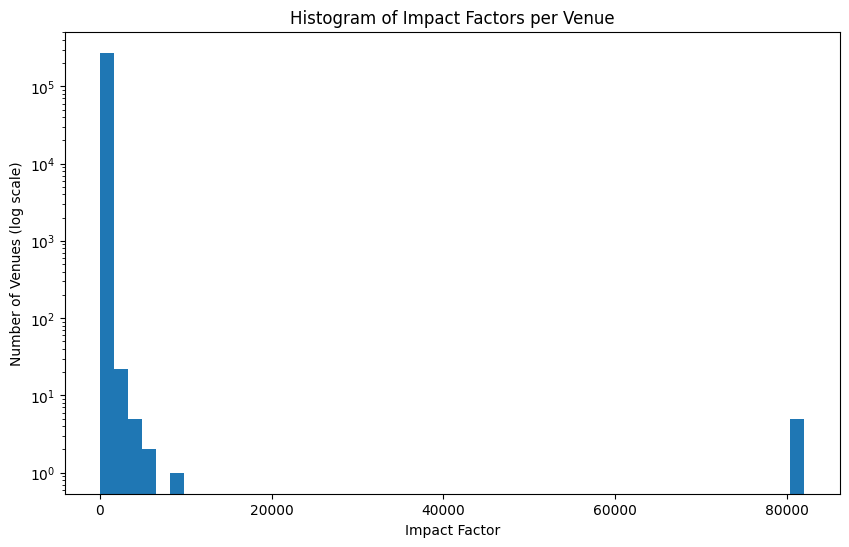

In [147]:
# Plot the histogram of impact factors
plt.figure(figsize=(10, 6))
plt.hist(impact_factors, bins=50, log=True)

plt.title("Histogram of Impact Factors per Venue")
plt.xlabel("Impact Factor")
plt.ylabel("Number of Venues (log scale)")

plt.show()


PART H

In [148]:
# Filter out None values from impact_factors
filtered_impact_factors = {k: v for k, v in impact_factors.items() if v is not None}

# Find the venue with the maximum impact factor
max_impact_venue = max(filtered_impact_factors, key=filtered_impact_factors.get)
max_impact_value = filtered_impact_factors[max_impact_venue]

# Print the venue with its impact factor
print(f"The venue with the highest impact factor is '{max_impact_venue}' with an impact factor of {max_impact_value:.2f}")


The venue with the highest impact factor is 'AI EDAM' with an impact factor of 82080.00


PART I

Text(0.5, 1.0, 'Impact factor of each venue')

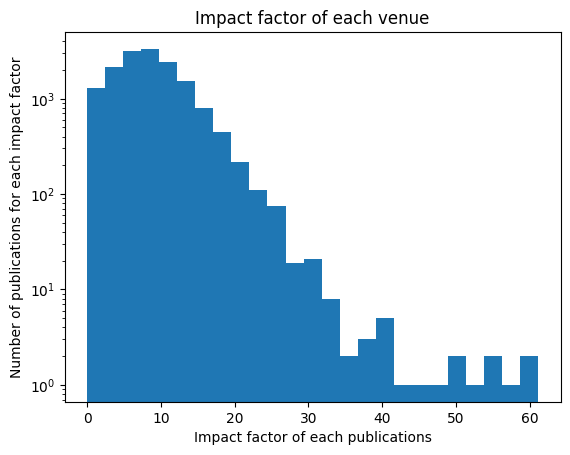

In [149]:
impact_factors_10 = {venue: (venue_citations[venue] / venue_publications[venue]) for venue in venue_citations if venue_publications[venue] >= 10}
plt.hist(impact_factors_10.values(), bins=25, log=True)
plt.xlabel("Impact factor of each publications")
plt.ylabel("Number of publications for each impact factor")
plt.title("Impact factor of each venue")

In [150]:
# Filter the DataFrame and select specific columns using the query method
filtered_df = df.query('venue == "Graphics Interface 1990"')[["id", "num_citations", "venue"]]

# Display the filtered DataFrame
filtered_df


,id,num_citations,venue
2133984,2381731,82080,Graphics Interface 1990


In [151]:
import pandas as pd

# Convert the impact_factors_10 dictionary values to a Pandas Series
impact_factors_series = pd.Series(impact_factors_10.values())


In [152]:
# Calculate mean
mean_impact_factor = impact_factors_series.mean()

# Calculate median
median_impact_factor = impact_factors_series.median()

# Print the results
print(f"Mean Impact Factor: {mean_impact_factor}")
print(f"Median Impact Factor: {median_impact_factor}")


Mean Impact Factor: 8.752176210916748
Median Impact Factor: 8.182692307692308


Mean: Because of the skewness of the data, authors with a large number of publications may have an impact on this mean value.
Median (2nd Quartile): This shows that most venues have a small impact factor, as the median is rather low.


PART J

In [155]:
from collections import defaultdict

year_citations = defaultdict(int)
year_references = defaultdict(int)
year_publications = defaultdict(int)

for index, row in df.iterrows():
    year = row['year']
    year_citations[year] += row.get('num_citations', 0)
    year_references[year] += row.get('num_refs', 0)
    year_publications[year] += 1

average_citations = {year: (year_citations[year] / year_publications[year]) for year in year_citations}
average_references = {year: (year_references[year] / year_publications[year]) for year in year_references}


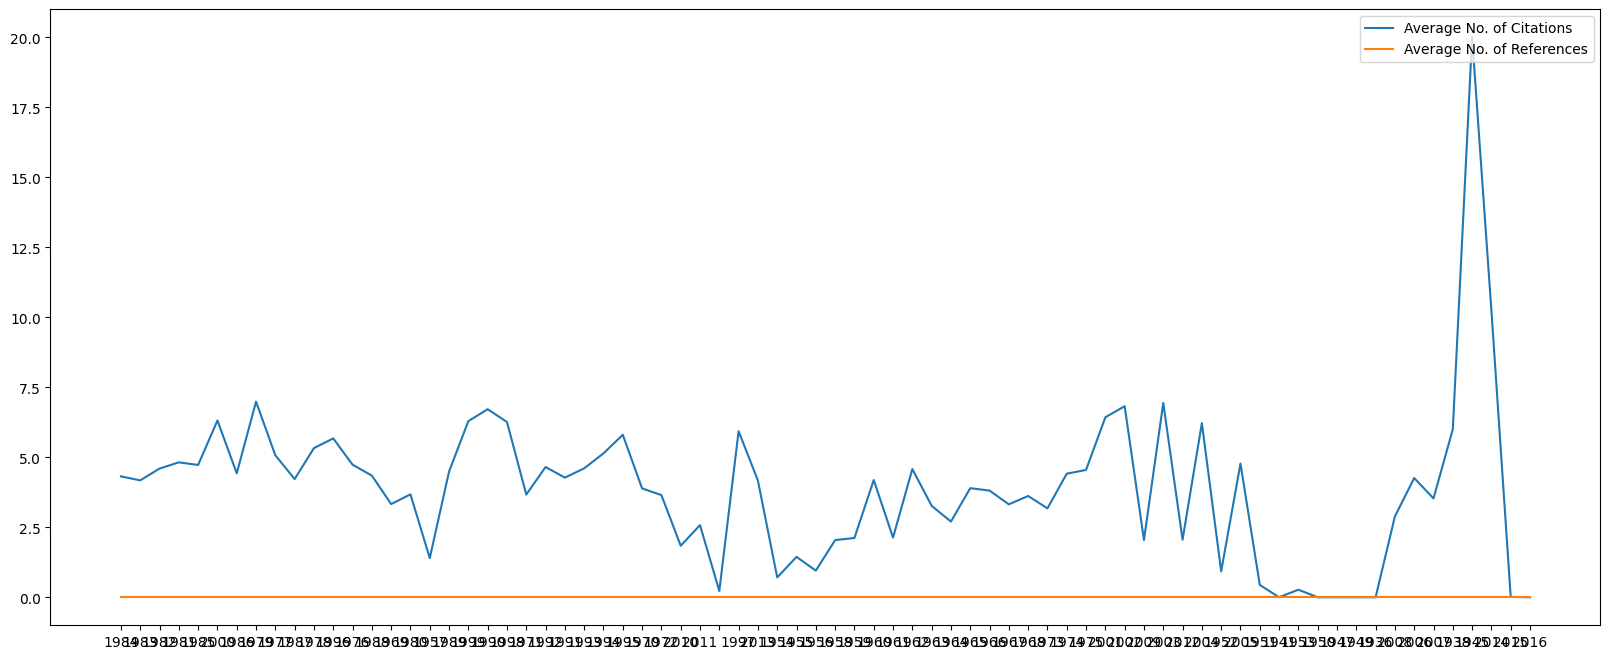

In [156]:
plt.figure(figsize=(20, 8))
plt.plot(average_references.keys(), average_citations.values(), label="Average No. of Citations")
plt.plot(average_references.keys(), average_references.values(), label="Average No. of References")
plt.legend(loc='upper right')

The strong rise in citations near the right end of the chart may be the result of an outlier or incorrect data entry that is inflating the citation counts for that time period, or it may suggest that a few publications from that year have had a significant impact.